In [1]:
!pip install gensim==3.4.0
!pip install tqdm>=2.0.0
!pip install pyfasta==0.5.2
!pip install numpy>=1.18.1
!pip install Biopython
!pip install tensorflow

     |████████████████████████████████| 22.2 MB 4.3 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 547 kB/s  eta 0:00:01
  Created wheel for gensim: filename=gensim-3.4.0-cp37-cp37m-linux_x86_64.whl size=23778410 sha256=50b970758374450357e62d87366479c820775ebb1b753b481020d875799589f4
  Stored in directory: /home/ucloud/.cache/pip/wheels/de/a4/46/4e18f7d25915b16e0e790a5362e455aba6cadc486994806c05
Successfully built gensim
  Created wheel for pyfasta: filename=pyfasta-0.5.2-py3-none-any.whl size=14225 sha256=239e65252ca713657491f347d9bef1c9219415e0bd3211dedb4dd0072d99a53a
  Stored in directory: /home/ucloud/.cache/pip/wheels/57/e5/90/5c791cec27d88e2bcee7e859a6b83e7c7f03d2da494d3e5a8a
Successfully built pyfasta
     |████████████████████████████████| 2.3 MB 4.3 MB/s eta 0:00:01
     |████████████████████▉           | 295.7 MB 146.4 MB/s eta 0:00:02

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



     |████████████████████████████████| 454.3 MB 35 kB/s 
     |████████████████████████████████| 14.8 MB 31.5 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 23.5 MB/s eta 0:00:01    |▏                               | 20 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 145 kB/s  eta 0:00:01
     |████████████████████████████████| 462 kB 30.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 64.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.0 MB 82.4 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 4.0 MB 75.9 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 465 kB/s  eta 0:00:01
     |████████████████████████████████| 781 kB 32.9 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 31.6 MB/s eta 0:00:01
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77166 sha256=624ee4bd8af34f82822b0eb7

In [2]:
from Bio import SeqIO
import sys
import numpy as np
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os

In [13]:
import os
import numpy as np
print('Si comincia!')
matrices = []
labels = []
sequences=[]
n = 0
seq_len = 1000
root = 'Fastas'
numbers=[]

with open('fastas.fasta','+w') as g:
 
    for el in list(os.listdir(root)):

      name_fa = root+'/'+el+'/'+el+'.fa'

      if os.path.isfile(name_fa):
          numbers.append(int(el.split('_')[0]))
          with open(name_fa, 'r') as f:
              
              header = str(f.readlines())
              label = (header.split(',')[1]).split(':')[1]
              labels.append(label)

              sequence=header.split(',')[14]
              sequence=str(sequence[3:-2])
              #print(len(sequence))
              protein_len=len(sequence)

              
              g.writelines(f'>{sequence}\n')
              g.writelines(f'{sequence}\n')
              sequences.append(sequence)

    print('fine')
    



Si comincia!
fine


In [9]:
def split_ngrams(seq, n):
    a, b, c = zip(*[iter(seq)]*n), zip(*[iter(seq[1:])]*n), zip(*[iter(seq[2:])]*n)
    str_ngrams = []
    for ngrams in [a,b,c]:
        x = []
        for ngram in ngrams:
            x.append("".join(ngram))
        str_ngrams.append(x)
    return str_ngrams

    f.close()

       
def get_ngram_vectors_l(file_path):
    ngram_vectors = {}
    vector_length = None
     
    with open(file_path) as infile:
        
        for line in infile:
            
            line_parts = line.rstrip().split()   
            # skip first line with metadata in word2vec text file format
            if len(line_parts) > 2:  
                
                ngram, vector_values = line_parts[0], line_parts[1:]          
                ngram_vectors[ngram] = (np.array(list(map(lambda x: x, vector_values)))).astype(float)
    
    return ngram_vectors


 
input_path='fastas.fasta'
out_path='prova.txt'
with open(out_path,'+w') as f:
    for r in SeqIO.parse(input_path, "fasta"):
        ngram_patterns = split_ngrams(r.seq, 3)
        for ngram_pattern in ngram_patterns:
            f.write(" ".join(ngram_pattern) + "\n")
            sys.stdout.write(".")

#VFL VLL PLV SSQ CVN LTT RTQ LPP AYT NSF TRG VYY PDK VFR SSV LHS TQD LFL PFF SNV TWF HAI --S GTN GTK RFD NPV LPF NDG VYF AST EKS NII RGW IFG TTL DSK TQS LLI VNN ATN VVI KVC EFQ FCN DPF LGV -YH KNN KSW MES EFR VYS SAN NCT FEY VSQ PFL MDL EGK QGN FKN LRE FVF KNI DGY FKI YSK HTP INL VRD LPQ GFS ALE PLV DLP IGI NIT RFQ TLL ALH RSY LTP GDS FSG WTA GAA AYY VGY LQP RTF LLK YNE NGT ITD AVD CAL DPL SET KCT LKS FTV EKG IYQ TSN FRV QPT ESI VRF PNI TNL CPF GEV FNA TRF ASV YAW NRK RIS NCV ADY SVL YNS ASF STF KCY GVS PTK LND LCF TNV YAD SFV IRG DEV RQI APG QTG KIA DYN YKL PDD FTG CVI AWN SNN LDS KVG GNY NYL YRL FRK SNL KPF ERD IST EIY QAG STP CNG VEG FNC YFP LQS YGF QPT YGV GYQ PYR VVV LSF ELL HAP ATV CGP KKS TNL VKN KCV NFN FNG LTG TGV LTE SNK KFL PFQ QFG RDI DDT TDA VRD PQT LEI LDI TPC SFG GVS VIT PGT NTS NQV AVL YQG VNC TEV PLA IHA DQL TPT WRV YST GSN VFQ TRA GCL IGA EHV NNS YEC DIP IGA GIC ASY QTQ TNS HRR ARS VAS QSI IAY TMS LGA ENS VAY SNN SIA IPI NFT ISV TTE ILP VSM TKT SVD CTM YIC GDS TEC SNL LLQ YGS FCT QLN RAL TGI AVE QDK NTQ EVF AQV KQI YKT PPI KDF GGF NFS QIL PDP SKP SKR SFI EDL LFN KVT LAD AGF IKQ YGD CLG DIA ARD LIC AQK FNG LTV LPP LLT DEM IAQ YTS ALL AGT ITS GWT FGA GAA LQI PFA MQM AYR FNG IGV TQN VLY ENQ KLI ANQ FNS AIG KIQ DSL SST ASA LGK LQD VVN QNA QAL NTL VKQ LSS NFG AIS SVL NDI LAR LDK VEA EVQ IDR LIT GRL QSL QTY VTQ QLI RAA EIR ASA NLA ATK MSE CVL GQS KRV DFC GKG YHL MSF PQS APH GVV FLH VTY VPA QEK NFT TAP AIC HDG KAH FPR EGV FVS NGT HWF VTQ RNF YEP QII TTH NTF VSG NCD VVI GIV NNT VYD PLQ PEL DSF KEE LDK YFK NHT SPD VDL GDI SGI NAS VVN IQK EID RLN EVA KNL NES LID LQE LGK YEQ YIK WPW YIW LGF IAG LIA IVM VTI MLC CMT SCC SCL KGC CSC GSC CKF DED DSE PVL KGV KLH

#MFV FLV LLP LVS SQC VNL TTR TQL PPA YTN SFT RGV YYP DKV FRS SVL HST QDL FLP FFS NVT WFH AI- -SG TNG TKR FDN PVL PFN DGV YFA STE KSN IIR GWI FGT TLD SKT QSL LIV NNA TNV VIK VCE FQF CND PFL GV- YHK NNK SWM ESE FRV YSS ANN CTF EYV SQP FLM DLE GKQ GNF KNL REF VFK NID GYF KIY SKH TPI NLV RDL PQG FSA LEP LVD LPI GIN ITR FQT LLA LHR SYL TPG DSS SGW TAG AAA YYV GYL QPR TFL LKY NEN GTI TDA VDC ALD PLS ETK CTL KSF TVE KGI YQT SNF RVQ PTE SIV RFP NIT NLC PFG EVF NAT RFA SVY AWN RKR ISN CVA DYS VLY NSA SFS TFK CYG VSP TKL NDL CFT NVY ADS FVI RGD EVR QIA PGQ TGK IAD YNY KLP DDF TGC VIA WNS NNL DSK VGG NYN YLY RLF RKS NLK PFE RDI STE IYQ AGS TPC NGF EGF NCY FPL QSY GFQ PTY GVG YQP YRV VVL SFE LLH APA TVC GPK KST NLV KNK CVN FNF NGL TGT GVL TES NKK FLP FQQ FGR DID DTT DAV RDP QTL EIL DIT PCS FGG VSV ITP GTN TSN QVA VLY QGV NCT EVP VAI HAD QLT PTW RVY STG SNV FQT RAG CLI GAE HVN NSY ECD IPI GAG ICA SYQ TQI NSH RRA RSV ASQ SII AYT MSL GAE NSV AYS NNS IAI PIN FTI SVT TEI LPV SMT KTS VDC TMY ICG DST ECS NLL LQY GSF CTQ LNR ALT GIA VEQ DKN TQE VFA QVK QIY KTP PIK DFG GFN FSQ ILP DPS KPS KRS FIE DLL FNK VTL ADA GFI KQY GDC LGD IAA RDL ICA QKF NGL TVL PPL LTD EMI AQY TSA LLA GTI TSG WTF GAG AAL QIP FAM QMA YRF NGI GVT QNV LYE NQK LIA NQF NSA IGK IQD SLS STA SAL GKL QDV VNQ NAQ ALN TLV KQL SSN FGA ISS VLN DIL ARL DKV EAE VQI DRL ITG RLQ SLQ TYV TQQ LIR AAE IRA SAN LAA TKM SEC VLG QSK RVD FCG KGY HLM SFP QSA PHG VVF LHV TYV PAQ EKN FTT APA ICH DGK AHF PRE GVF VSN GTH WFV TQR NFY EPQ IIT THN TFV SGN CDV VIG IVN NTV YDP LQP ELD SFK EEL DKY FKN HTS PDV DLG DIS GIN ASV VNI QKE IDR LNE VAK NLN ESL IDL QEL GKY EQY IKW PWY IWL GFI AGL IAI VMV TIM LCC MTS CCS CLK GCC SCG SCC KFD EDD SEP VLK GVK LHY
from gensim.models import word2vec
corpus=word2vec.Text8Corpus(out_path)

model = word2vec.Word2Vec([line.rstrip().split() for line in open('prova.txt')], min_count = 1, size=100, sg=1, window=25,workers=3)
model.wv.save_word2vec_format('prova2.txt')
n_gram_vec=get_ngram_vectors_l('prova2.txt')

def normalize(x):
    return x / np.sqrt(np.dot(x, x))

def to_vecs(seq, ngram_vectors):
        ngrams_seq = split_ngrams(seq, 3)


        protvec = np.zeros(100, dtype=np.float32)
        for index in range(len(seq) + 1 - 3):
            ngram = seq[index:index + 3]
            if ngram in ngram_vectors:
                ngram_vector = ngram_vectors[ngram]
                protvec += ngram_vector
        return normalize(protvec)

def make_protein_vector_for_uniprot(fasta_file, protein_vector_fname, ngram_vectors):
    
    with open(protein_vector_fname, 'w') as output_file:
        for record in SeqIO.parse(fasta_file, "fasta"):
            protein_name = record.name.split('|')[-1]
            protein_vector = to_vecs(record.seq, ngram_vectors)

            output_file.write('{}\t{}\n'.format(protein_name, ' '.join(map(str, protein_vector))))

make_protein_vector_for_uniprot(input_path,'results.txt',n_gram_vec)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in true_divide


In [14]:
data=[]
proteins=[]
cnt=0
l=[]
with open('results.txt') as f:
    for row in f:
        
        try:
            proteins.append(row.split('\t')[0])
            
            features=(row.strip().split('\t')[1])#.split(' ')
            #features=np.array(features).astype(float)
            l.append(int(labels[cnt]))
            data.append(features)
        except:
            print(row)
        cnt+=1




	nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan

	nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan



In [15]:
data=[x.split(' ') for x in data]
dataset=[np.array(x).astype(float) for x in data]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import os
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

For Random Forest
RandomForestClassifier(bootstrap=False, random_state=1)
0.9307136247975943
On the test set :0.9179331306990881


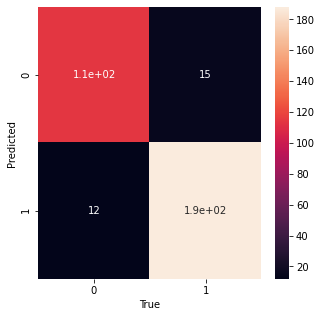

In [28]:
X_train,X_test, y_train,y_test= train_test_split(dataset,l, stratify=l, test_size=0.2)
model=RandomForestClassifier()
params = {
        'criterion': ["gini", "entropy"],
        'max_features': ["auto", "sqrt", "log2"],
        'random_state': [1],
        'bootstrap': [True, False]
    }
print(f'For Random Forest')
clf = GridSearchCV(model, params,cv=10)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)
y_pred=clf.predict(X_test)
print(f'On the test set :{accuracy_score(y_test,y_pred)}')
fig,ax= plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.savefig('encoding/conf_matrix_rf.png')
plt.show()

For linear SVC


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

LinearSVC(C=10)
0.8964434420541292
On the test set :0.8905775075987842


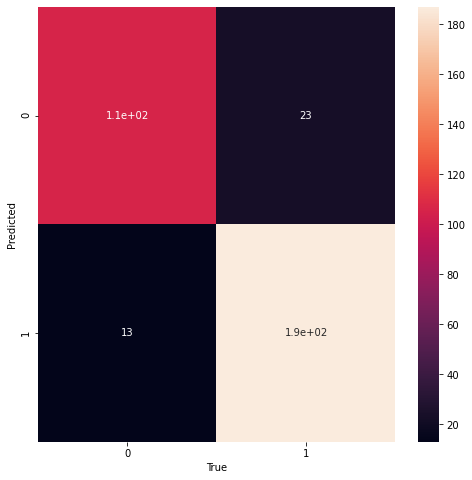

In [29]:
model= LinearSVC()
params = {
    
    'C' : [0.0001, 0.1, 1, 10, 1000],
    
}
print(f'For linear SVC')
clf = GridSearchCV(model, params,cv=10)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)
y_pred=clf.predict(X_test)
print(f'On the test set :{accuracy_score(y_test,y_pred)}')
fig,ax= plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.savefig('encoding/conf_matrix_linearsvc.png')
plt.show()

For SVC
SVC(C=10000, gamma=0.1)
0.9063034929447144
On the test set :0.8936170212765957


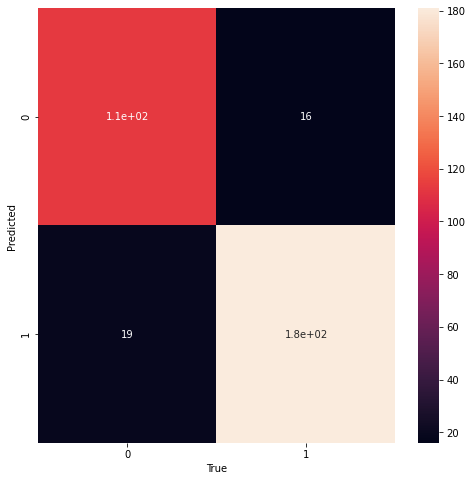

In [30]:
model= SVC()
params = {
    
    'C' : [ 0.01, 0.1, 1, 10, 1000,10000],
    'gamma': [0.001,0.1,1,1000]
}
print(f'For SVC')
clf = GridSearchCV(model, params,cv=10)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)
y_pred=clf.predict(X_test)
print(f'On the test set :{accuracy_score(y_test,y_pred)}')
fig,ax= plt.subplots(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.savefig('encoding/conf_matrix_svc.png')
plt.show()

In [47]:
with open('dataset.txt', '+w') as f:
    for i,el in enumerate(proteins):
        try:
            f.write(f'{proteins[i]},{l[i]},{dataset[i]} \n')
        except:
            print('ciao')

ciao
ciao
